# HR - Analytics Use case

## Data description 

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

In [430]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Loading csv file

In [431]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [432]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

**observation**
* Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager have numeric values
* Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime have object type values

In [433]:
df.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,NaN,882,NaN,NaN,NaN,326,NaN,673,NaN,NaN,NaN,1470,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,2.721769,NaN,65.891156,2.729932,2.063946,NaN,2.728571,NaN,6502.931293,14313.103401,2.693197,NaN,NaN,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,1.093082,NaN,20.329428,0.711561,1.106940,NaN,1.102846,NaN,4707.956783,7117.786044,2.498009,NaN,NaN,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2094.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2911.000000,8047.000000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4919.000000,14235.500000,2.000000,NaN,NaN,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,4.000000,NaN,83.750000,3.000000,3.000000,NaN,4.000000,NaN,8379.000000,20461.500000,4.000000,NaN,NaN,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [434]:
df.shape

(1470, 35)

**There are 1470 rows and 35 columns**

# EDA

## Checking null values

In [435]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

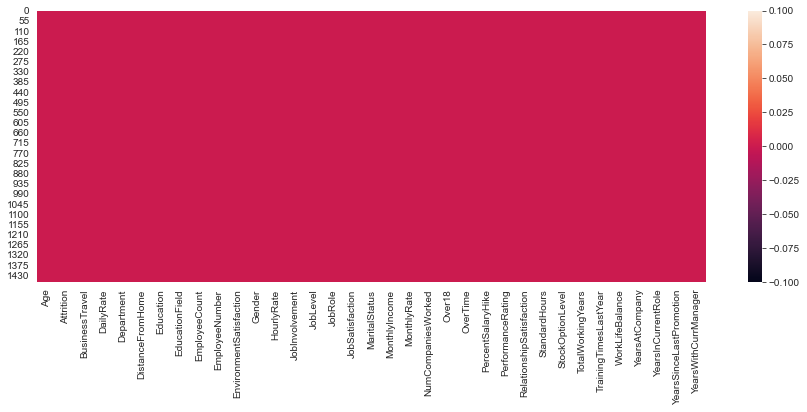

In [436]:
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull())
plt.show()

**there are 0 null values**

## Univariate Analysis

<AxesSubplot:xlabel='Attrition', ylabel='count'>

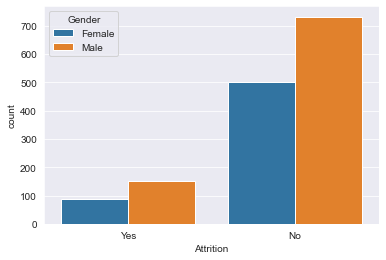

In [437]:
sns.countplot('Attrition', hue='Gender', data=df)

Here we can see the attrition more in male member as compare to female

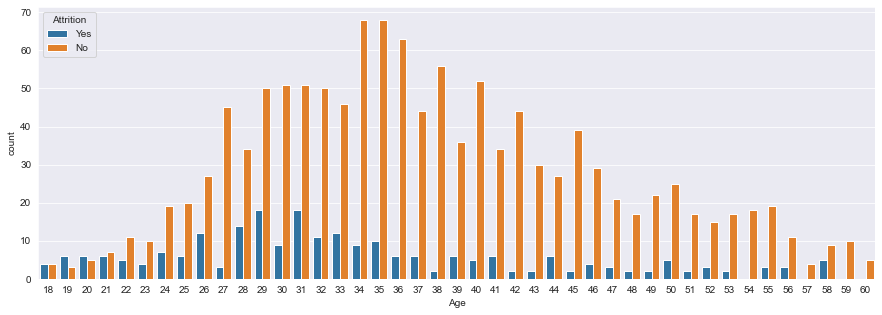

In [438]:
plt.figure(figsize=(15,5))
sns.countplot('Age', hue='Attrition', data=df)
plt.show()

Here we can see the the attrition is very less in the age between 30-40.

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

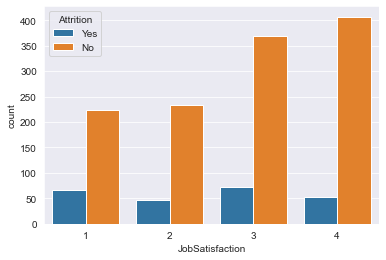

In [439]:
sns.countplot('JobSatisfaction', hue='Attrition', data=df)

It is obvious that the person don't leave their job if they are satisfied with their jobs.

<AxesSubplot:xlabel='Department', ylabel='count'>

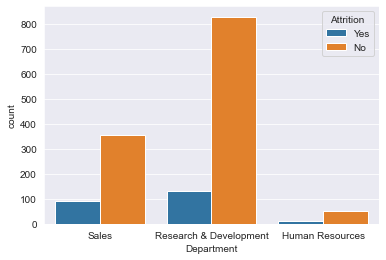

In [440]:
sns.countplot('Department', hue='Attrition', data=df)

least people leave there job in research and development department

<AxesSubplot:xlabel='Attrition', ylabel='count'>

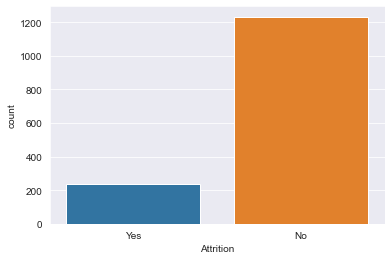

In [441]:
sns.countplot('Attrition', data=df)

We can see that our data is not balanced, we will balance our data in further steps.

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

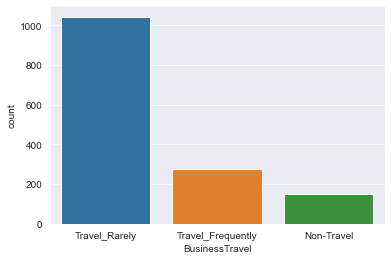

In [442]:
sns.countplot('BusinessTravel', data=df)

very few people do not travel

<AxesSubplot:xlabel='Department', ylabel='count'>

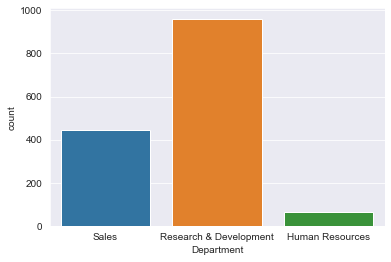

In [443]:
sns.countplot('Department', data=df)

most of the people are in research and development department

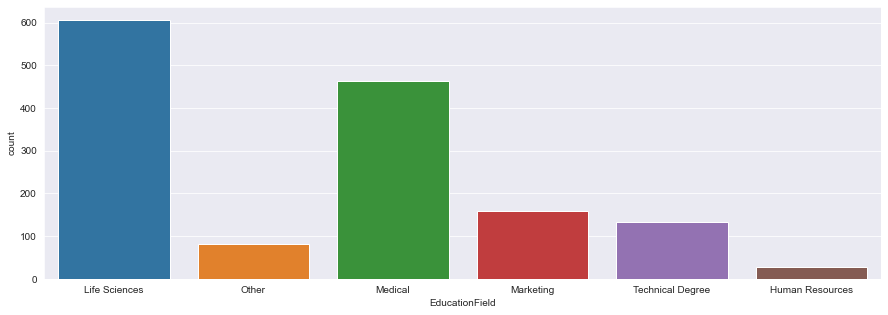

In [444]:
plt.figure(figsize=(15,5))
sns.countplot('EducationField', data=df)
plt.show()

Most of the people are from life science background

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

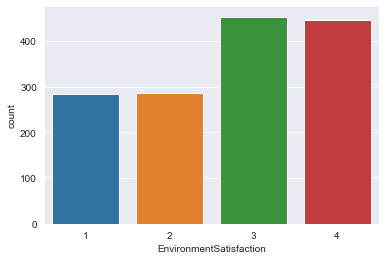

In [445]:
sns.countplot('EnvironmentSatisfaction', data=df)

most of the people are satisfied with the environment

<AxesSubplot:xlabel='Gender', ylabel='count'>

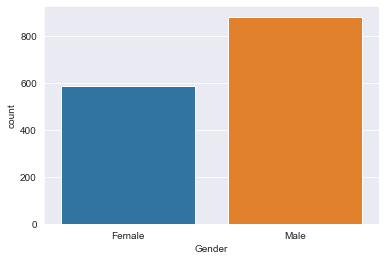

In [446]:
sns.countplot('Gender', data=df)

In [447]:
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

882 out of 1470 are male employees. 60:40 ratio of male to female employees in the company.

<AxesSubplot:xlabel='count', ylabel='JobRole'>

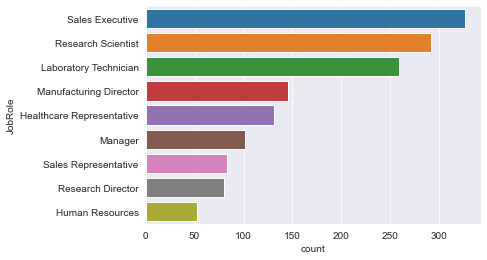

In [448]:
sns.countplot(y='JobRole', data=df)

most of the people are sales executive

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

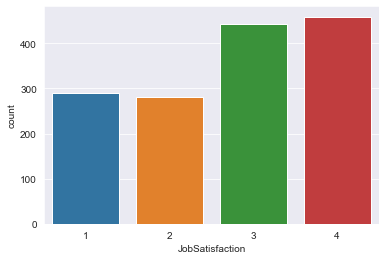

In [449]:
sns.countplot('JobSatisfaction', data=df)

most of the people are satisfied with the job

## Bivariate Analysis 

<AxesSubplot:xlabel='Age', ylabel='MonthlyIncome'>

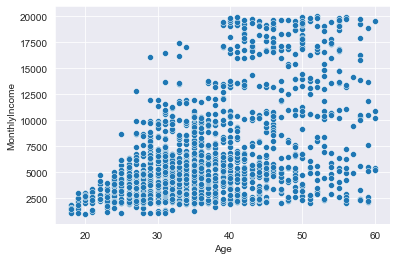

In [450]:
sns.scatterplot(x='Age', y='MonthlyIncome', data=df)

Scatterplot of Age against Monthly Income shows that as the Age increases Monthly Income has also increased. We can also the Monthly Income for different age group.

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='MonthlyIncome'>

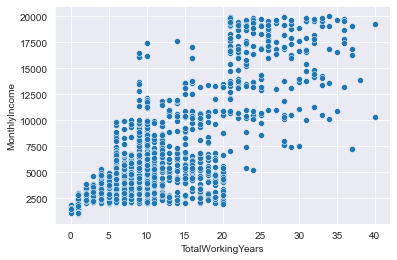

In [451]:
sns.scatterplot(x='TotalWorkingYears', y='MonthlyIncome', data=df)

We can see that the plot on Total Working Years and Monthly Income indicates that most of the employees beyond 20 years of work experience have a salary above 15000.

<AxesSubplot:xlabel='count', ylabel='EducationField'>

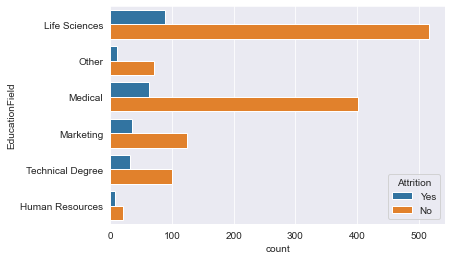

In [452]:
sns.countplot(y='EducationField', hue='Attrition', data=df)

In [453]:
pd.crosstab(df['Attrition'], df['EducationField'])

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
Attrition,,,,,,
No,20,517,124,401,71,100
Yes,7,89,35,63,11,32


We can see the count-wise maximum number of attrition observed in employee with ‘Life Sciences’ and 'Medical' education field. However, if we consider each department 26% attrition observed in Human Resources department


In [454]:
pd.crosstab(df['Attrition'], df['JobSatisfaction'])

JobSatisfaction,1,2,3,4
Attrition,,,,
No,223,234,369,407
Yes,66,46,73,52


<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

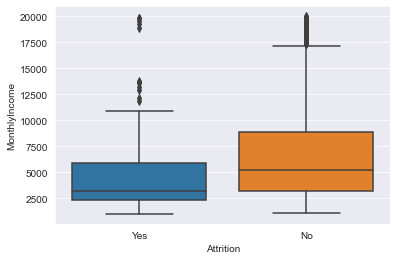

In [455]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)

The average monthly income of attrite employees is much less.

<AxesSubplot:xlabel='Attrition', ylabel='Age'>

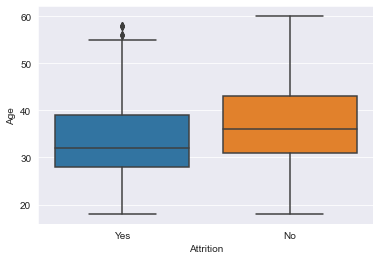

In [456]:
sns.boxplot(x='Attrition', y='Age', data=df)

The attrition is more in the age of 32.

<AxesSubplot:xlabel='Attrition', ylabel='DistanceFromHome'>

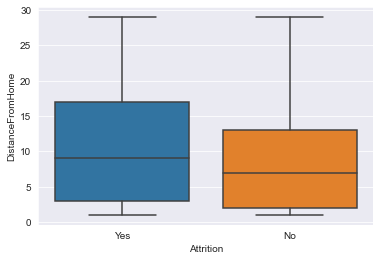

In [457]:
sns.boxplot(x='Attrition', y='DistanceFromHome', data=df)

Employees who stay at far away places seem to be leaving the company.

In [458]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['Attrition'] = LE.fit_transform(df['Attrition'])

In [459]:
df['Attrition'].unique()

array([1, 0])

In [460]:
df['Attrition']

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

### Checking Correlation

In [461]:
corr_mat = df.corr()

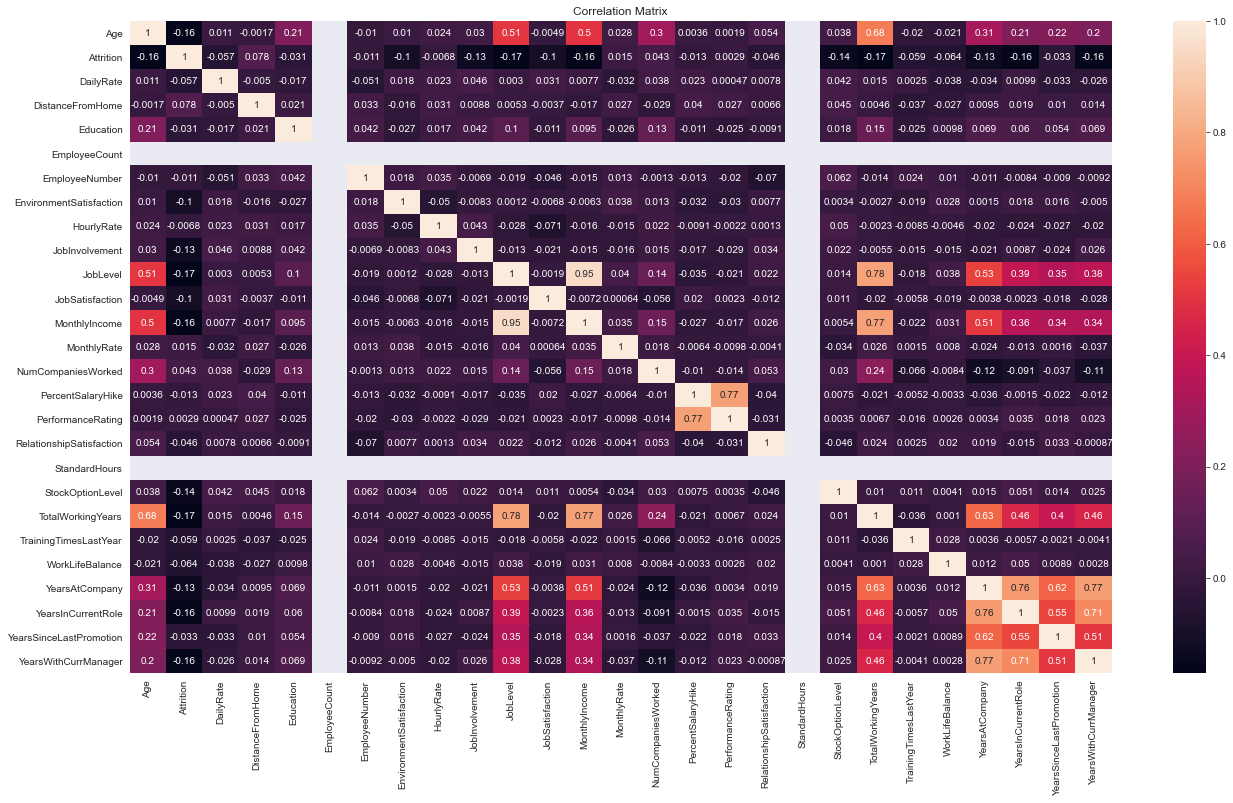

In [462]:
plt.figure(figsize=(22,12))
sns.heatmap(corr_mat, annot=True)
plt.title('Correlation Matrix')
plt.show()

Here we can see that Attrition is not correlated with any variable.

In [463]:
pd.set_option('display.max_columns', 500)

In [464]:
df1 = df[['Age','DailyRate','DistanceFromHome','Education','EmployeeCount','EmployeeNumber','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StandardHours','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']].copy()
df1

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,4,2571,12290,4,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,1,9991,21457,4,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,2,6142,5174,1,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,2,5390,13243,2,14,3,4,80,0,17,3,2,9,6,0,8


In [465]:
df2= df[['Attrition', 'BusinessTravel','Department',
         'EducationField','Gender','JobRole','MaritalStatus','Over18', 'OverTime']].copy()
df2.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,1,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,0,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,1,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,0,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,0,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


# Data Cleaning

### Checking skewness

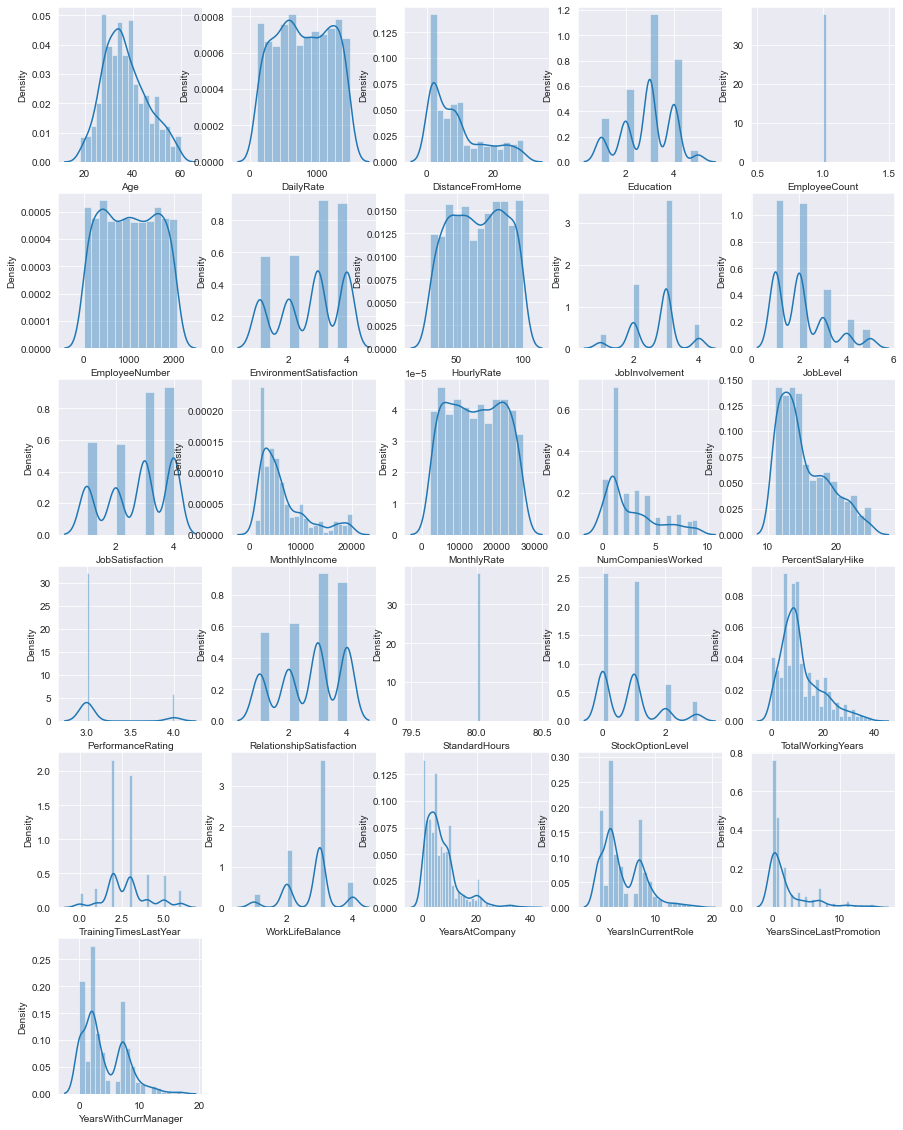

In [466]:
i=1
plt.figure(figsize=(15,20))
for col in df1.columns:
    plt.subplot(6,5,i)
    sns.distplot(df1[col])
    i+=1

Skewness is present in most of the attributes

In [467]:
df1.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

The skewness is there

In [468]:
for col in df1.columns:
    if df1.skew().loc[col]>0.55:
        df1[col]=np.log1p(df1[col])

In [469]:
df1.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome           -0.029121
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.448133
JobSatisfaction            -0.329672
MonthlyIncome               0.286448
MonthlyRate                 0.018578
NumCompaniesWorked          0.092896
PercentSalaryHike           0.513543
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.271963
TotalWorkingYears          -0.622175
TrainingTimesLastYear      -1.075852
WorkLifeBalance            -0.552480
YearsAtCompany             -0.207708
YearsInCurrentRole         -0.383498
YearsSinceLastPromotion     0.718805
YearsWithCurrManager       -0.357686
dtype: float64

skewness is removed

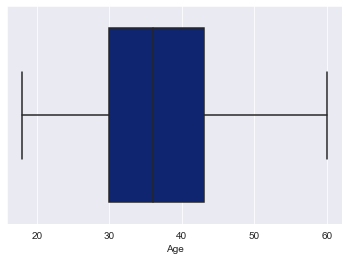

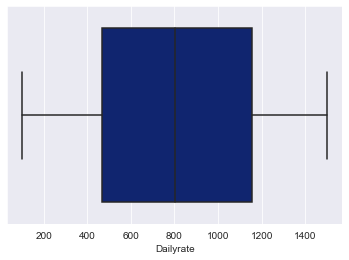

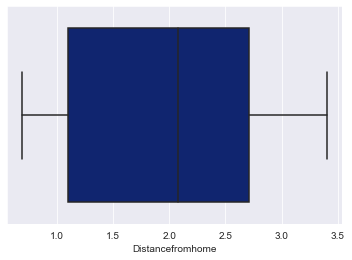

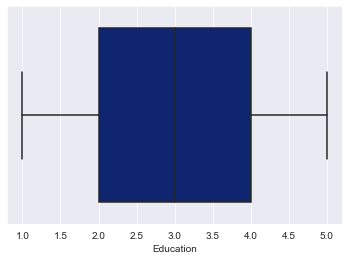

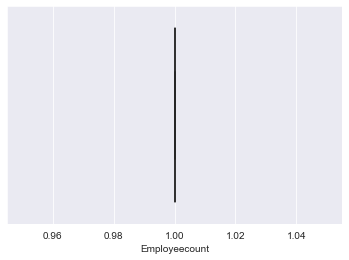

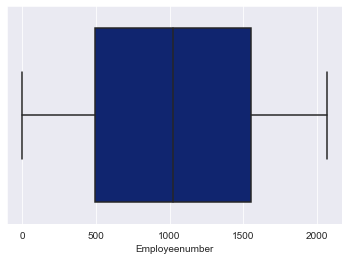

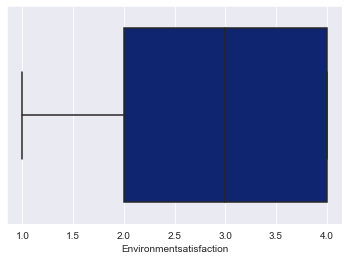

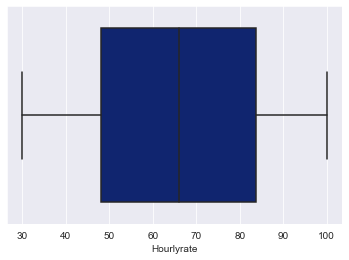

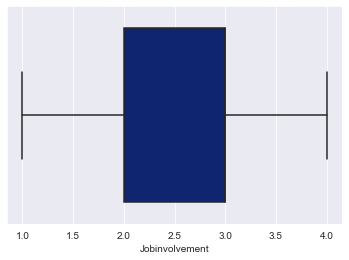

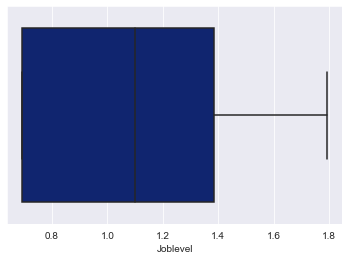

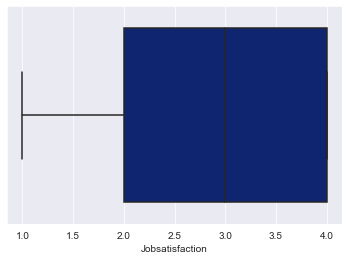

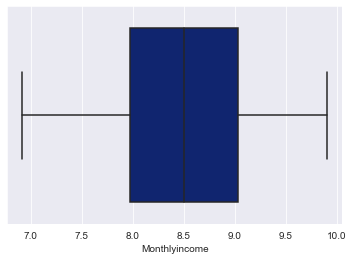

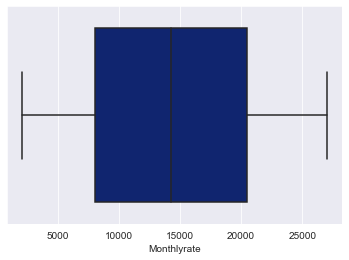

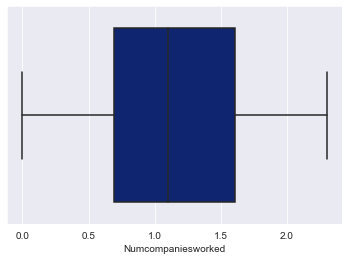

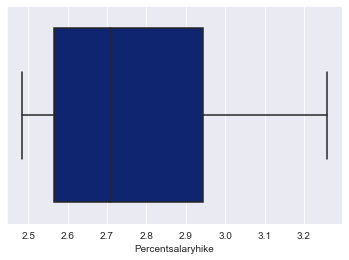

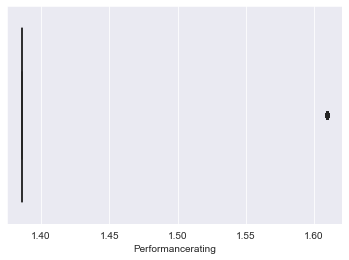

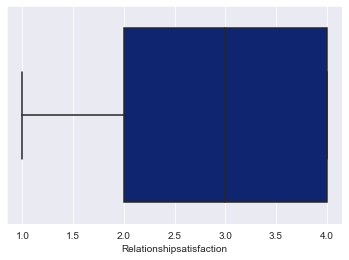

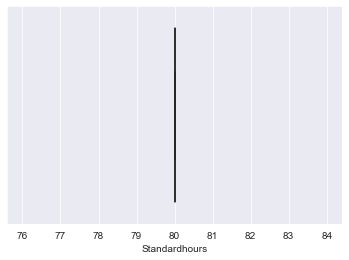

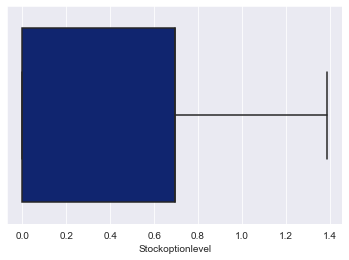

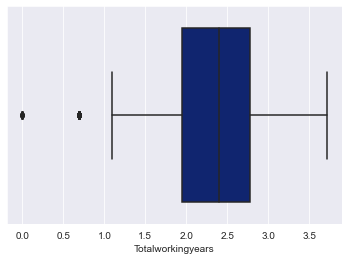

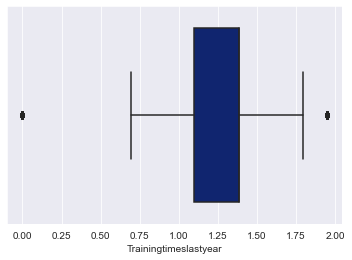

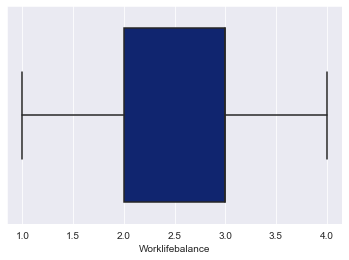

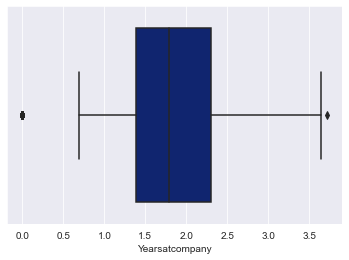

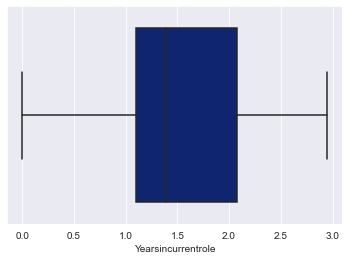

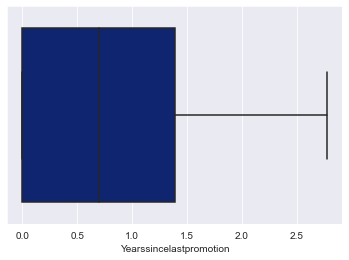

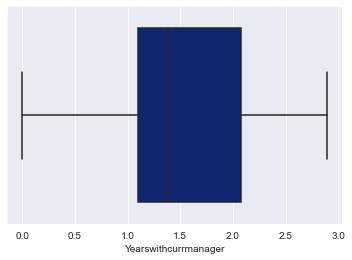

In [470]:
from matplotlib import pyplot as plt #to determine the count
for col in df1.columns:
    sns.set_style('darkgrid')
    plt.figure()
    sns.boxplot(data=df1,x=df1[col],palette='dark')
    plt.xlabel(col.title())
    plt.show()

only columns yearsatcompany and Trainingtimelastyear have outlier otherwise there are no outliers.

In [471]:
df1.shape

(1470, 26)

In [472]:
df1.drop(['EmployeeCount', 'EmployeeNumber', 'StandardHours'], axis=1, inplace=True)

### converting categorical to numerical data

In [473]:
df2.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,1,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,0,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,1,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,0,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,0,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [474]:
df2.drop(['Over18'], axis=1, inplace=True)

In the dataset there are 4 irrelevant columns, i.e:EmployeeCount, EmployeeNumber, Over18 and StandardHour. So, we have removed these for more accuracy.

In [475]:
MaritalStatus = pd.get_dummies(df['MaritalStatus'])
BusinessTravel = pd.get_dummies(df['BusinessTravel'])
Department = pd.get_dummies(df['Department'])
EducationField = pd.get_dummies(df['EducationField'])
Gender = pd.get_dummies(df['Gender'])
JobRole = pd.get_dummies(df['JobRole'])
OverTime = pd.get_dummies(df['OverTime'])

### CONCATENATION DF1+ DF2

In [476]:
df_final = pd.concat([df1, MaritalStatus, BusinessTravel, Department, EducationField, Gender, JobRole, OverTime], axis='columns')

In [477]:
Attrition=df['Attrition']

In [478]:
df_final = pd.concat([df_final,Attrition], axis='columns')

Combining the categorical variables and corelated variables (Numerical Format)

In [479]:
df_final.head(5)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Divorced,Married,Single,Non-Travel,Travel_Frequently,Travel_Rarely,Human Resources,Research & Development,Sales,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,Female,Male,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,No,Yes,Attrition
0,41,1102,0.693147,2,2,94,3,1.098612,4,8.698514,19479,2.197225,2.484907,1.386294,1,0.000000,2.197225,0.000000,1,1.945910,1.609438,0.000000,1.791759,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49,279,2.197225,1,3,61,2,1.098612,2,8.543056,24907,0.693147,3.178054,1.609438,4,0.693147,2.397895,1.386294,3,2.397895,2.079442,0.693147,2.079442,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
2,37,1373,1.098612,2,4,92,2,0.693147,3,7.645398,2396,1.945910,2.772589,1.386294,2,0.000000,2.079442,1.386294,3,0.000000,0.000000,0.000000,0.000000,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1
3,33,1392,1.386294,4,4,56,3,0.693147,3,7.975908,23159,0.693147,2.484907,1.386294,3,0.000000,2.197225,1.386294,3,2.197225,2.079442,1.386294,0.000000,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,591,1.098612,1,1,40,3,0.693147,2,8.151622,16632,2.302585,2.564949,1.386294,4,0.693147,1.945910,1.386294,3,1.098612,1.098612,1.098612,1.098612,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0


In [480]:
df_final.shape

(1470, 52)

In [481]:
df_final.isna().any()

Age                          False
DailyRate                    False
DistanceFromHome             False
Education                    False
EnvironmentSatisfaction      False
HourlyRate                   False
JobInvolvement               False
JobLevel                     False
JobSatisfaction              False
MonthlyIncome                False
MonthlyRate                  False
NumCompaniesWorked           False
PercentSalaryHike            False
PerformanceRating            False
RelationshipSatisfaction     False
StockOptionLevel             False
TotalWorkingYears            False
TrainingTimesLastYear        False
WorkLifeBalance              False
YearsAtCompany               False
YearsInCurrentRole           False
YearsSinceLastPromotion      False
YearsWithCurrManager         False
Divorced                     False
Married                      False
Single                       False
Non-Travel                   False
Travel_Frequently            False
Travel_Rarely       

In [483]:
df_final.shape

(1470, 52)

<AxesSubplot:ylabel='Frequency'>

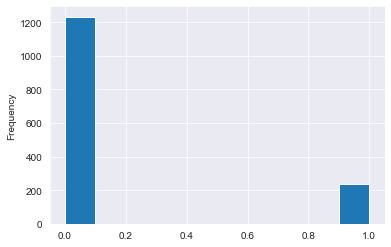

In [484]:
df_final['Attrition'].plot.hist()

Now we will balance our target variable.

### Train and test split

In [485]:
x = df_final.drop('Attrition', axis=1)

In [486]:
y = df_final['Attrition']

In [487]:
x.shape

(1470, 51)

### Target balancing

In [488]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE()

x = np.array(x)
# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x,y.ravel())

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 1233, 1: 237})
Resample dataset shape Counter({1: 1233, 0: 1233})


# Model Training

In [489]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## Finding best random state

In [490]:
maxAccu = 0
maxRS = 0

for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.33, random_state=i)
    lg = LogisticRegression()
    lg.fit(x_train, y_train)
    pred = lg.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is: ",maxAccu,"on Random State: ",maxRS)

Best accuracy is:  0.8095823095823096 on Random State:  54


We have found best random_state value as 54. We will create our train_test_split using random_state(54)

## Creating train test split

In [509]:
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.33, random_state=54)

In [510]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print('f1_Score:', f1_score(y_test, pred))

Accuracy Score: 0.8095823095823096
[[334  72]
 [ 83 325]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       406
           1       0.82      0.80      0.81       408

    accuracy                           0.81       814
   macro avg       0.81      0.81      0.81       814
weighted avg       0.81      0.81      0.81       814

f1_Score: 0.8074534161490683


In [511]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print('f1_Score:', f1_score(y_test, pred))

Accuracy Score: 0.7014742014742015
[[237 169]
 [ 74 334]]
              precision    recall  f1-score   support

           0       0.76      0.58      0.66       406
           1       0.66      0.82      0.73       408

    accuracy                           0.70       814
   macro avg       0.71      0.70      0.70       814
weighted avg       0.71      0.70      0.70       814

f1_Score: 0.7332601536772778


In [512]:
svc = SVC()
svc.fit(x_train, y_train)
pred = svc.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print('f1_Score:', f1_score(y_test, pred))

Accuracy Score: 0.5257985257985258
[[314  92]
 [294 114]]
              precision    recall  f1-score   support

           0       0.52      0.77      0.62       406
           1       0.55      0.28      0.37       408

    accuracy                           0.53       814
   macro avg       0.53      0.53      0.50       814
weighted avg       0.53      0.53      0.50       814

f1_Score: 0.3713355048859935


In [513]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
pred = gnb.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print('f1_Score:', f1_score(y_test, pred))

Accuracy Score: 0.7493857493857494
[[267 139]
 [ 65 343]]
              precision    recall  f1-score   support

           0       0.80      0.66      0.72       406
           1       0.71      0.84      0.77       408

    accuracy                           0.75       814
   macro avg       0.76      0.75      0.75       814
weighted avg       0.76      0.75      0.75       814

f1_Score: 0.7707865168539325


## Checking cross validation score

In [514]:
scr = cross_val_score(lr, x, y, cv=5)
print('Cross validation score for Logistic regression:',scr.mean()*100)

Cross validation score for Logistic regression: 85.64625850340136


In [515]:
scr = cross_val_score(knn, x, y, cv=5)
print('Cross validation score for K Nearest Neighbors:', scr.mean()*100)

Cross validation score for K Nearest Neighbors: 81.97278911564625


In [516]:
scr = cross_val_score(svc, x, y, cv=5)
print('Cross validation score for SVC:', scr.mean()*100)

Cross validation score for SVC: 83.87755102040816


In [517]:
scr = cross_val_score(gnb, x, y, cv=5)
print('Cross validation score for GaussianNB:', scr.mean()*100)

Cross validation score for GaussianNB: 80.47619047619048


**Final model**
* Logistic Regression: accuracy - cross_val_score = 0.80-0.85 = 0.05
* KNeighbors Classifier: accuracy - cross_val_score = 0.70-0.81 = 0.11
* SVC : accuracy - cross_val_score = 0.52-0.83 = 0.31
* Gaussian Naive Bayes: accuracy - cross_val_score = 0.74-0.80 = 0.06
* The best algo with minimum difference between accuracy and cross
* validation score as well as best precision is Logistic Regression.
* Hence we will be using Logistic Regression model for the Hypertuning

## Hyperparameter tuning 

In [518]:
penalty = ['l1', 'l2', 'elasticnet', 'none']
fit_intercept = ['True', 'False']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
multi_class = ['auto', 'ovr', 'multinomial']
C = np.logspace(-5, 8, 15)

params = {'penalty' : penalty,
         'fit_intercept' : fit_intercept,
         'solver' : solver,
         'multi_class' : multi_class,
         'C' : C}

In [519]:
from sklearn.model_selection import GridSearchCV

In [520]:
GCV = GridSearchCV(LogisticRegression(), params, cv=5)
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08]),
                         'fit_intercept': ['True', 'False'],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [521]:
GCV.best_params_

{'C': 268.2695795279727,
 'fit_intercept': 'True',
 'multi_class': 'ovr',
 'penalty': 'l1',
 'solver': 'liblinear'}

In [522]:
model = LogisticRegression(C=268.2695795279727, fit_intercept='True', multi_class='ovr', penalty='l1', solver='liblinear')
model.fit(x_train, y_train)
modpred = model.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test, modpred))
print(confusion_matrix(y_test, modpred))
print(classification_report(y_test, modpred))
print('f1_Score:', f1_score(y_test, modpred)*100)

Accuracy Score: 0.8230958230958231
[[327  79]
 [ 65 343]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       406
           1       0.81      0.84      0.83       408

    accuracy                           0.82       814
   macro avg       0.82      0.82      0.82       814
weighted avg       0.82      0.82      0.82       814

f1_Score: 82.65060240963855


## Plotting ROC AUC curve

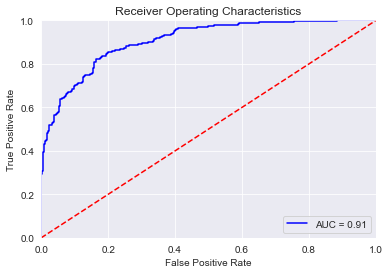

In [523]:
# calculate the fpr and tpr for all thresholds of the classification

probs = model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# plotting
plt.title('Receiver Operating Characteristics')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Checcking how much our predictions are correct

In [524]:
predictions = pd.DataFrame({'Predictions':modpred,'Real Values':y_test})

In [525]:
predictions

,Predictions,Real Values
0,1,1
1,1,1
2,0,0
3,1,1
4,0,0
...,...,...
809,1,1
810,0,0
811,1,1
812,1,1


## Saving the model

In [526]:
import joblib
joblib.dump(model, 'HRmodel.pkl')

['HRmodel.pkl']

## Loading the saved model

In [527]:
saved_model = joblib.load('HRmodel.pkl')
prediction = model.predict(x_test)
print(f1_score(y_test, prediction)*100)

82.65060240963855
